In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sklearn
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import fastai

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
#client_credentials_manager = SpotifyClientCredentials(client_id="1eaff819b6934d7ebdb085638d2642bc", client_secret="c3703463c55246fbaf11b0facfe68e48")
#sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
#Imports playlist dataset

#import json
#f = open('challenge_set.json')

In [ ]:
#data = json.load(f)

In [ ]:
#len(data["playlists"])

10000

In [ ]:
#Remove empty playlists

#for i in data["playlists"]:
#  if not i["tracks"]:
#    data["playlists"].remove(i)

In [ ]:
#len(data["playlists"])

9500

In [ ]:
#Extracts features from tracks

# plays = []

# for i in data["playlists"]:
#   if len(i['tracks']) > 10:
#     uriList = []
#     aUriList = []
#     for j in range(10):
#       tUri = i['tracks'][j]['track_uri']
#       aUri = i['tracks'][j]['artist_uri']
#       uriList.append(tUri)
#       aUriList.append(aUri)
#     curTracks = sp.tracks(uriList)
#     trackFeats = sp.audio_features(uriList)
#     trackArtists = sp.artists(aUriList)
#     trackList = []
#     for j in range(10):
#       trackDict = {}
#       trackDict['track_name'] = i['tracks'][j]['track_name']
#       trackFeat = trackFeats[j]
#       trackFromURI = curTracks['tracks'][j]
#       trackArtist = trackArtists['artists'][j]
#       trackDict['danceability'] = trackFeat['danceability']
#       trackDict['energy'] = trackFeat['energy']
#       trackDict['tempo'] = trackFeat['tempo']
#       trackDict['duration_ms'] = trackFeat['duration_ms']
#       if trackArtist['genres']:
#         trackDict['genre'] = trackArtist['genres'][0]
#       else:
#         trackDict['genre'] = "None"
#       if trackFromURI['album']['release_date']:
#         trackDict['release_year'] = trackFromURI['album']['release_date'][0:4]
#       else:
#         trackDict['release_year'] = 0
#       trackList.append(trackDict)
#     plays.append(trackList)

In [ ]:
#Write playlist data to a text file

# with open("pre_85_95.txt", "w") as my_file:
#   for line in plays:
#     my_file.write(f"{line}\n")

In [ ]:
# print(plays[0])

[{'track_name': 'Before I Let Go (feat. Frankie Beverly) [2004 - Remastered]', 'danceability': 0.783, 'energy': 0.563, 'tempo': 103.069, 'duration_ms': 236107, 'genre': 'classic soul', 'release_year': '2004'}, {'track_name': 'Me and Mrs. Jones', 'danceability': 0.303, 'energy': 0.555, 'tempo': 67.322, 'duration_ms': 285760, 'genre': 'classic soul', 'release_year': '1972'}, {'track_name': 'Love TKO (Re-Recorded / Remastered)', 'danceability': 0.683, 'energy': 0.579, 'tempo': 145.064, 'duration_ms': 281983, 'genre': 'classic soul', 'release_year': '2004'}, {'track_name': 'Turn off the Lights', 'danceability': 0.63, 'energy': 0.494, 'tempo': 118.501, 'duration_ms': 354853, 'genre': 'classic soul', 'release_year': '1977'}, {'track_name': 'Sexual Healing', 'danceability': 0.805, 'energy': 0.602, 'tempo': 94.382, 'duration_ms': 238600, 'genre': 'classic soul', 'release_year': '1982'}, {'track_name': 'After The Dance - Vocal', 'danceability': 0.734, 'energy': 0.49, 'tempo': 109.738, 'duration

In [ ]:
#Read saved playlist data

# blankList = []

# with open("play_file_pre.txt", "r") as file:
#   playsList = []

#   for line in file:
#     line = line.strip()

#     parsed_list = eval(line)
#     playsList.append(parsed_list)
#   blankList.extend(playsList)

# with open("pre_55_65.txt", "r") as file:
#   playsList = []

#   for line in file:
#     line = line.strip()

#     parsed_list = eval(line)
#     playsList.append(parsed_list)
#   blankList.extend(playsList)

# with open("pre_65_75.txt", "r") as file:
#   playsList = []

#   for line in file:
#     line = line.strip()

#     parsed_list = eval(line)
#     playsList.append(parsed_list)
#   blankList.extend(playsList)

# with open("pre_75_85.txt", "r") as file:
#   playsList = []

#   for line in file:
#     line = line.strip()

#     parsed_list = eval(line)
#     playsList.append(parsed_list)
#   blankList.extend(playsList)

In [ ]:
# print(len(blankList))

4000


In [ ]:
#Creates a random song list

# plays = blankList
# randSongs = []

# for i in plays:
#   for j in i:
#     randSongs.append(j.copy())

In [ ]:
#Create additional features

# import random

# lookTrack = False
# currentTrack = False

# for i in plays:
#   if plays.index(i) > len(plays)//2:
#     #Add a random song to the end of half the playlists
#     i.pop()
#     i.append(random.choice(randSongs.copy()))
#   #Create similarity scores and sorenson index scores for first 9 songs in a playlist
#   for j in range(9):
#     numSim = 0
#     numCurrent = 0
#     numLook = 0
#     for k in data["playlists"]:
#       if k["tracks"]:
#         if any(d["track_name"] == i[-1]["track_name"] for d in k["tracks"]):
#           lookTrack = True
#           numLook += 1
#         if any(d["track_name"] == i[j]["track_name"] for d in k["tracks"]):
#           currentTrack = True
#           numCurrent += 1
#         if lookTrack and currentTrack:
#             numSim += 1
#         lookTrack = False
#         currentTrack = False
#     i[j]["sorenson"] = (2*numSim)/(numCurrent+numLook)
#     i[j]["num_similar"] = numSim

In [ ]:
#Save completed playlist dataset with 4000 items

# with open("completed.txt", "w") as my_file:
#   for line in plays:
#     my_file.write(f"{line}\n")

In [ ]:
# print(plays[3833])

[{'track_name': "Creepin'", 'danceability': 0.464, 'energy': 0.889, 'tempo': 87.858, 'duration_ms': 232720, 'genre': 'contemporary country', 'release_year': '2011', 'sorenson': 0.012987012987012988, 'num_similar': 1}, {'track_name': 'The Man I Want to Be', 'danceability': 0.489, 'energy': 0.498, 'tempo': 141.883, 'duration_ms': 207213, 'genre': 'contemporary country', 'release_year': '2009', 'sorenson': 0.013793103448275862, 'num_similar': 1}, {'track_name': 'Drunk On You', 'danceability': 0.558, 'energy': 0.872, 'tempo': 143.971, 'duration_ms': 213547, 'genre': 'contemporary country', 'release_year': '2011', 'sorenson': 0.0, 'num_similar': 0}, {'track_name': 'Take A Little Ride', 'danceability': 0.472, 'energy': 0.866, 'tempo': 163.867, 'duration_ms': 187613, 'genre': 'contemporary country', 'release_year': '2012', 'sorenson': 0.0, 'num_similar': 0}, {'track_name': 'Why Ya Wanna', 'danceability': 0.299, 'energy': 0.676, 'tempo': 167.498, 'duration_ms': 221373, 'genre': 'contemporary c

In [ ]:
#Loads completed dataset

blankList = []

with open("completed.txt", "r") as file:
  playsList = []

  for line in file:
    line = line.strip()

    parsed_list = eval(line)
    playsList.append(parsed_list)
  blankList.extend(playsList)

In [ ]:
#Converts list to dataframe layout and assigns labels

dfList = []
plays = blankList

for i in plays:
  longPlay = []
  for j in i:
    for k, v in j.items():
      longPlay.append(v)
  dfList.append(longPlay)

for i in range(len(dfList)//2):
  dfList[i].append(1)

for i in range(len(dfList)//2, len(dfList)):
  dfList[i].append(0)

for i in dfList:
  for j in i:
    print(j)

Streaming output truncated to the last 5000 lines.
0.397
0.969
134.288
218293
alternative metal
1992
0.0
0
XO
0.431
0.377
173.67
213627
neo mellow
2014
0
Float On
0.649
0.888
100.975
208467
alternative rock
2004
0.012987012987012988
1
Twist My Fingaz
0.903
0.602
99.01
254520
cali rap
2016
0.0
0
Bodied
0.906
0.578
120.01
228403
deep underground hip hop
2015
0.0
0
Alright
0.807
0.693
127.035
218280
conscious hip hop
2014
0.06691449814126393
9
Calm Down
0.538
0.624
102.346
127427
indie pop rap
2015
0.05517241379310345
4
Not Afraid
0.854
0.954
114.609
248133
detroit hip hop
2010
0.04316546762589928
3
My Nigga
0.681
0.462
171.127
235600
cali rap
2014
0.014285714285714285
1
Too Easy
0.865
0.807
130.054
167559
deep underground hip hop
2015
0.0
0
The Hills - Remix
0.65
0.632
112.927
263960
canadian contemporary r&b
2016
0.0
0
Go Flex
0.665
0.498
81.967
179613
dfw rap
2016
0
Symphony No. 40 in G Minor, K. 550: Allegro molto
0.356
0.311
116.517
422413
british orchestra
2009
0.0
0
Requiem, K. 626

In [ ]:
df = pd.DataFrame(data = dfList, columns=['title0', 'danceability0', 'energy0', 'tempo0', 'duration_ms0', 'genre0', 'release_year0', 'num_similar0', "sorenson0",
                           'title1', 'danceability1', 'energy1', 'tempo1', 'duration_ms1', 'genre1', 'release_year1', 'num_similar1', "sorenson1",
                           'title2', 'danceability2', 'energy2', 'tempo2', 'duration_ms2', 'genre2', 'release_year2', 'num_similar2', "sorenson2",
                           'title3', 'danceability3', 'energy3', 'tempo3', 'duration_ms3', 'genre3', 'release_year3', 'num_similar3', "sorenson3",
                           'title4', 'danceability4', 'energy4', 'tempo4', 'duration_ms4', 'genre4', 'release_year4', 'num_similar4', "sorenson4",
                           'title5', 'danceability5', 'energy5', 'tempo5', 'duration_ms5', 'genre5', 'release_year5', 'num_similar5', "sorenson5",
                           'title6', 'danceability6', 'energy6', 'tempo6', 'duration_ms6', 'genre6', 'release_year6', 'num_similar6', "sorenson6",
                           'title7', 'danceability7', 'energy7', 'tempo7', 'duration_ms7', 'genre7', 'release_year7', 'num_similar7', "sorenson7",
                           'title8', 'danceability8', 'energy8', 'tempo8', 'duration_ms8', 'genre8', 'release_year8', 'num_similar8', "sorenson8",
                           'title9', 'danceability9', 'energy9', 'tempo9', 'duration_ms9', 'genre9', 'release_year9', 'alike_song'])

In [ ]:
df.head(10)

,title0,danceability0,energy0,tempo0,duration_ms0,genre0,release_year0,num_similar0,sorenson0,title1,...,num_similar8,sorenson8,title9,danceability9,energy9,tempo9,duration_ms9,genre9,release_year9,alike_song
0,Before I Let Go (feat. Frankie Beverly) [2004 ...,0.783,0.563,103.069,236107,classic soul,2004,0.068966,1,Me and Mrs. Jones,...,0.071429,1,I Want You,0.515,0.793,100.551,274400,classic soul,1976,1
1,Make You Feel My Love,0.325,0.180,72.416,212040,british soul,2008,0.105263,5,Free Fallin' - Live at the Nokia Theatre,...,0.184615,6,Your Body Is a Wonderland,0.647,0.729,94.010,249627,neo mellow,2001,1
2,Stressed Out,0.734,0.637,169.977,202333,modern rock,2015,0.029412,2,Some Boys,...,0.074074,1,Flawless,0.568,0.871,119.990,246493,modern alternative rock,2013,1
3,"Circle Of Life - From ""The Lion King""/Soundtrack",0.402,0.391,83.789,239147,movie tunes,1994,0.333333,6,"I Just Can't Wait to Be King - From ""The Lion ...",...,0.387097,6,"When Will My Life Begin - From ""Tangled""/Sound...",0.673,0.420,108.066,152333,dance pop,2010,1
4,Click Click Boom,0.609,0.935,95.957,252400,alternative metal,2001,0.090909,2,Alive - New Album/Chris Lord-Alge Mix Version,...,0.333333,10,Headstrong,0.492,0.896,184.981,285570,alternative metal,2002,1
5,Throne,0.425,0.882,144.117,190920,melodic metalcore,2015,0.029851,1,Drown - New,...,0.293578,16,American Idiot,0.380,0.988,186.113,176346,modern rock,2004,1
6,Starboy,0.681,0.594,186.054,230453,canadian contemporary r&b,2016,0.074534,6,Let Me Love You,...,0.083333,2,Perfect Strangers,0.739,0.833,117.990,195313,pop,2017,1
7,Lord Pretty Flacko Jodye 2 (LPFJ2),0.485,0.720,207.982,126960,east coast hip hop,2015,0.070796,4,Electric Body,...,0.270270,15,Fight Night,0.874,0.706,89.961,216248,atl hip hop,2014,1
8,All I Do Is Win,0.549,0.791,150.093,227293,hip hop,2010,0.024390,1,Young Dumb & Broke,...,0.058824,2,Aftergold,0.602,0.901,94.570,191007,electropop,2016,1
9,If I Told You,0.532,0.640,84.029,212320,black americana,2017,0.058824,1,Southern Land,...,0.153846,1,The High Life (feat. Chase Rice),0.553,0.846,149.985,245354,contemporary country,2014,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title0         4000 non-null   object 
 1   danceability0  4000 non-null   float64
 2   energy0        4000 non-null   float64
 3   tempo0         4000 non-null   float64
 4   duration_ms0   4000 non-null   int64  
 5   genre0         4000 non-null   object 
 6   release_year0  4000 non-null   object 
 7   num_similar0   4000 non-null   float64
 8   sorenson0      4000 non-null   int64  
 9   title1         4000 non-null   object 
 10  danceability1  4000 non-null   float64
 11  energy1        4000 non-null   float64
 12  tempo1         4000 non-null   float64
 13  duration_ms1   4000 non-null   int64  
 14  genre1         4000 non-null   object 
 15  release_year1  4000 non-null   object 
 16  num_similar1   4000 non-null   float64
 17  sorenson1      4000 non-null   int64  
 18  title2  

In [ ]:
titles = ["title0", "title1", "title2", "title3", "title4", "title5", "title6", "title7", "title8", "title9"]
years = ["release_year0", "release_year1", "release_year2", "release_year3", "release_year4", "release_year5", "release_year6", "release_year7", "release_year8", "release_year9"]
genres = ["genre0", "genre1", "genre2", "genre3", "genre4", "genre5", "genre6", "genre7", "genre8", "genre9"]

df = df.drop(columns=titles)

In [ ]:
#Fixes year data

def fix_year(word):
    if not pd.isnull(word):
        word = int(word)
        if word == 0:
          return 2000
        return word
    else:
        return word

for i in years:
    df[i] = df[i].apply(fix_year)

In [ ]:
#Encodes genre data

from sklearn.preprocessing import LabelEncoder



for i in genres:
  le = LabelEncoder()
  print(df[i])
  le.fit(df[i])
  df[i] = le.transform(df[i])


0            classic soul
1            british soul
2             modern rock
3             movie tunes
4       alternative metal
              ...        
3995                  pop
3996           glam metal
3997    alternative metal
3998            reggaeton
3999         classic rock
Name: genre0, Length: 4000, dtype: object
0            classic soul
1              neo mellow
2            metropopolis
3             movie tunes
4       alternative metal
              ...        
3995          folktronica
3996                 None
3997    alternative metal
3998            reggaeton
3999           album rock
Name: genre1, Length: 4000, dtype: object
0                    classic soul
1                      neo mellow
2       canadian contemporary r&b
3                     movie tunes
4               alternative metal
                  ...            
3995                      art pop
3996                      brostep
3997            alternative metal
3998                    latin pop
3999

In [ ]:
#Creates a normalization function

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
normalized_df = normalize(df)

In [ ]:
from sklearn.model_selection import train_test_split

X = normalized_df.drop(columns=['alike_song'])
y = normalized_df["alike_song"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
#Defines model

from keras.layers import Dense, Dropout

model = keras.Sequential()
model.add(Dense(70, input_dim = 78, activation = "relu"))
model.add(Dropout(0.8))
model.add(Dense(20, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(7, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(loss = keras.losses.BinaryCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=1e-3), metrics = [keras.metrics.Precision()])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
100/100 [==============================] - 25s 104ms/step - loss: 0.7025 - precision: 0.5134
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 0.6712 - precision: 0.5692
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6304 - precision: 0.6604
Epoch 4/50
100/100 [==============================] - 1s 9ms/step - loss: 0.5727 - precision: 0.7428
Epoch 5/50
100/100 [==============================] - 2s 23ms/step - loss: 0.5262 - precision: 0.8140
Epoch 6/50
100/100 [==============================] - 9s 91ms/step - loss: 0.4896 - precision: 0.8463
Epoch 7/50
100/100 [==============================] - 1s 10ms/step - loss: 0.4779 - precision: 0.8695
Epoch 8/50
100/100 [==============================] - 1s 10ms/step - loss: 0.4553 - precision: 0.8912
Epoch 9/50
100/100 [==============================] - 4s 40ms/step - loss: 0.4496 - precision: 0.8918
Epoch 10/50
100/100 [==============================] - 6s 65ms/step - loss: 0.4305 

25/25 [==============================] - 0s 2ms/step


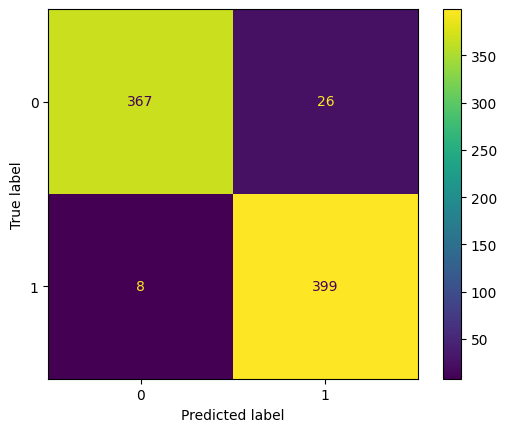

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test)

change_thresh = [1 if prob > 0.50 else 0 for prob in np.ravel(y_pred_prob)]

cm = confusion_matrix(y_test, change_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])

disp.plot()

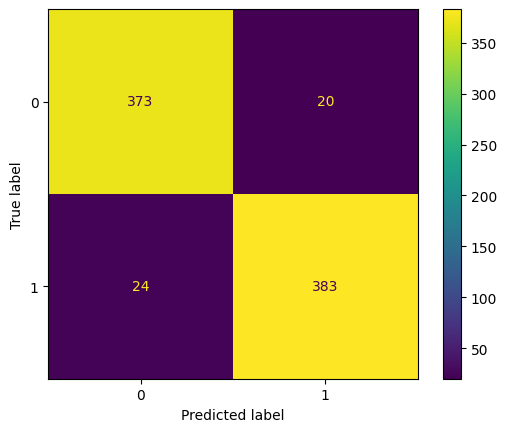

In [ ]:
change_thresh = [1 if prob > 0.60 else 0 for prob in np.ravel(y_pred_prob)]

cm = confusion_matrix(y_test, change_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])

disp.plot()

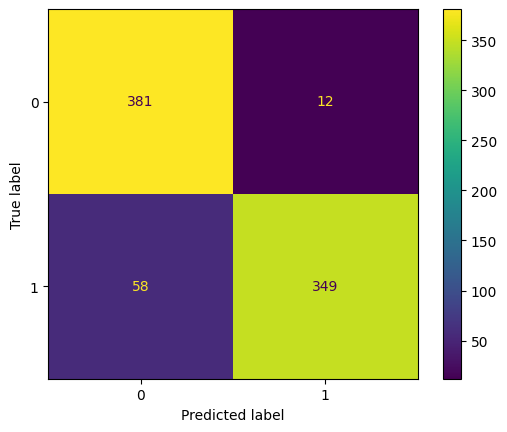

In [ ]:
change_thresh = [1 if prob > 0.70 else 0 for prob in np.ravel(y_pred_prob)]

cm = confusion_matrix(y_test, change_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])

disp.plot()

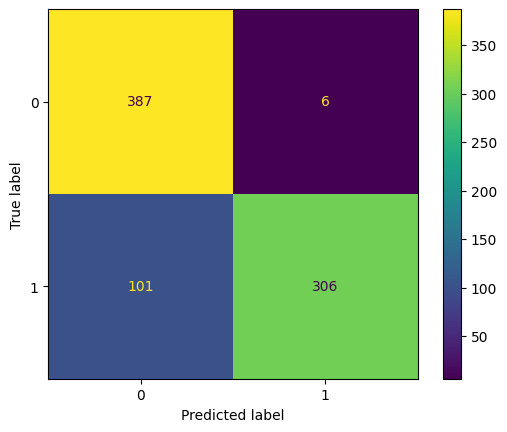

In [ ]:
change_thresh = [1 if prob > 0.80 else 0 for prob in np.ravel(y_pred_prob)]

cm = confusion_matrix(y_test, change_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])

disp.plot()

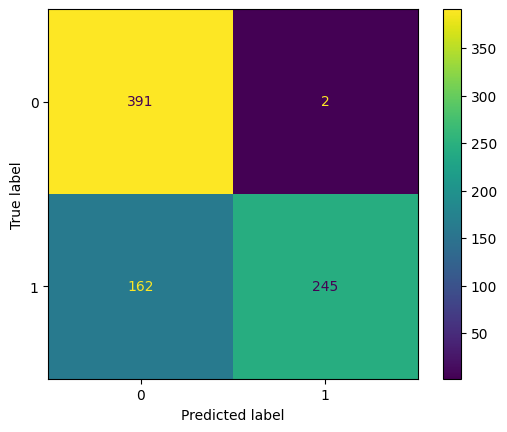

In [ ]:
change_thresh = [1 if prob > 0.90 else 0 for prob in np.ravel(y_pred_prob)]

cm = confusion_matrix(y_test, change_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])

disp.plot()